In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os

root='drive/MyDrive/JunctionX/'
for i in os.listdir(root+'Data/'):
  img = cv.imread(root+'Data/'+i)[:,200:1000]
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
  kernel = np.ones((3,3),np.uint8)
  dilation = cv.dilate(thresh,kernel,iterations = 1)
  plt.axis('off')
  plt.imshow(dilation)
  plt.savefig(root+'Data_preprocess/'+i, bbox_inches='tight')

In [24]:
from matplotlib.image import imread

im1 = imread(root+'Data_preprocess/217.jpg')
im2 = imread(root+'Data_preprocess/235.jpg')
iml = imread(root+'Data_preprocess/721.jpg')

type(im1)

numpy.ndarray

In [4]:
import sys

from scipy.linalg import norm
from scipy import sum, average

def compare_images(img1, img2):
    diff = img1 - img2  
    m_norm = sum(abs(diff)) 
    z_norm = norm(diff.ravel(), 0)  
    return (m_norm, z_norm)

In [23]:
compare_images(im1, im2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  


(5475848, 42665.0)

In [27]:
compare_images(im1, iml)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  


(8603818, 66218.0)

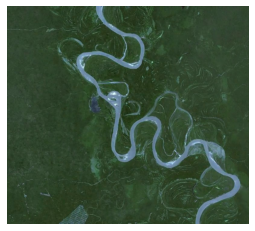

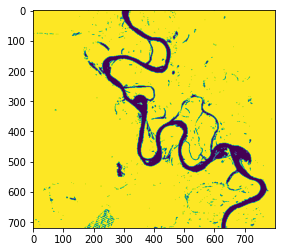

In [58]:
plt.axis('off')
plt.imshow(img)
plt.show()

plt.imshow(thresh)
plt.savefig(root+'Data_preprocess/217.png')

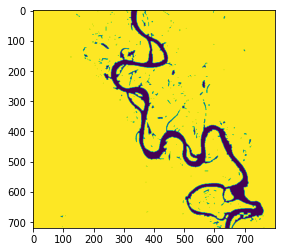

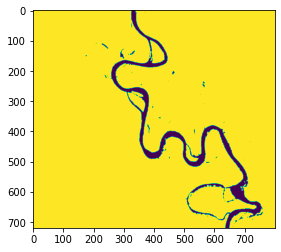

In [45]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
dilation = cv.dilate(thresh,kernel,iterations = 1)
plt.imshow(opening)
plt.show()
plt.imshow(dilation)